# Análise dos Dados do Airbnb - Estocolmo

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade Estocolmo, e ver quais insights podem ser extraídos a partir de dados brutos.**

## Obtenção dos Dados


In [0]:
# importar os pacotes necessarios
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [0]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv('http://data.insideairbnb.com/sweden/stockholms-l%C3%A4n/stockholm/2020-02-28/visualisations/listings.csv')

## Análise dos Dados
Esta etapa tem o objetivo de apresentar uma idéia geral dos dados, relacionado à sua estrutura.

**Dicionário das variáveis**

* `id`: Número do id gerado para identificar o imóvel
* `name`: Nome da propriedade anunciada
* `host_id`: Número de id do proprietário (anfitrião) da propriedade
* `neighbourhood_group`: Esta coluna não possui valores válidos
* `neighbourhood`: Nome do bairro
* `latitude`: Coordenada da latitude da propriedade
* `longitude`: Coordenada da longitude da propriedade
* `room_type`: Informa o tipo de quarto que é oferecido
* `price`: Preço para alugar o imóvel
* `minimum nights`: Quantidade mínima de noites para reservar
* `number of_reviews`: Número de reviews que a propriedade possui
* `reviews_per_month`: Quantidade de reviews por mês
* `calculated_host_listings_count`: Quantidades de imóveis do mesmo anfitrião
* `avaliability_365`: Número de dias de disponibilidade dentro de 365 dias

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas.

In [3]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365
0,155220,"Stockholm, new spacoius villa",746396,Madeleine,NaN,Skarpnäcks,59.24667,18.17799,Entire home/apt,1200,3,0,NaN,NaN,2,0
1,155685,Hornstull with water view!,748592,Robert,NaN,Södermalms,59.31535,18.03277,Entire home/apt,3184,4,22,2015-12-01,0.21,1,0
2,164448,Double room in central Stockholm with Wi-Fi,784312,Li,NaN,Södermalms,59.31268,18.06258,Private room,600,3,322,2020-01-29,3.08,2,156
3,170651,Petit Charm Rooftop next to heaven,814021,Marie,NaN,Södermalms,59.31568,18.03138,Entire home/apt,736,4,33,2019-09-01,0.32,1,211
4,206221,Doubleroom at Södermalm &trendySofo,1022374,Elisabeth,NaN,Södermalms,59.31226,18.07942,Shared room,668,3,79,2019-12-08,0.79,1,312


In [4]:
# mostrar os bairros
df.neighbourhood.unique()

array(['Skarpnäcks', 'Södermalms', 'Norrmalms', 'Kungsholmens',
       'Rinkeby-Tensta', 'Farsta', 'Älvsjö', 'Östermalms',
       'Enskede-Årsta-Vantörs', 'Hägersten-Liljeholmens', 'Bromma',
       'Skärholmens', 'Hässelby-Vällingby', 'Spånga-Tensta'], dtype=object)

### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

In [5]:
# identificar o volume de dados do DataFrame
print(f'Entradas:\t{df.shape[0]}')
print(f'Variáveis:\t{df.shape[1]}')

# verificar as 5 primeiras entradas do dataset
display(df.dtypes)

Entradas:	7677
Variáveis:	16


id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
dtype: object

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

A qualidade de um _dateset_ está relacionada à quantidade de valores ausentes. Sendo importante saber se esses valores faltantes são significativos comparados ao total de entradas.

* A coluna `neighbourhood_group` tem 100% de valores faltantes.
* A coluna `reviews_per_month` tem 22% de valores faltantes.
* A coluna `last_review` tem 22% de valores faltantes.
* A coluna `name` tem menos de 1% de valores faltantes.

Aparentemente esses valores faltantes não irão influenciar a análise.

In [6]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
reviews_per_month                 0.220268
last_review                       0.220268
name                              0.003256
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
minimum_nights                    0.000000
price                             0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_name                         0.000000
host_id                           0.000000
id                                0.000000
dtype: float64

### **Q3. Como as variáveis estão distribuidas?** 

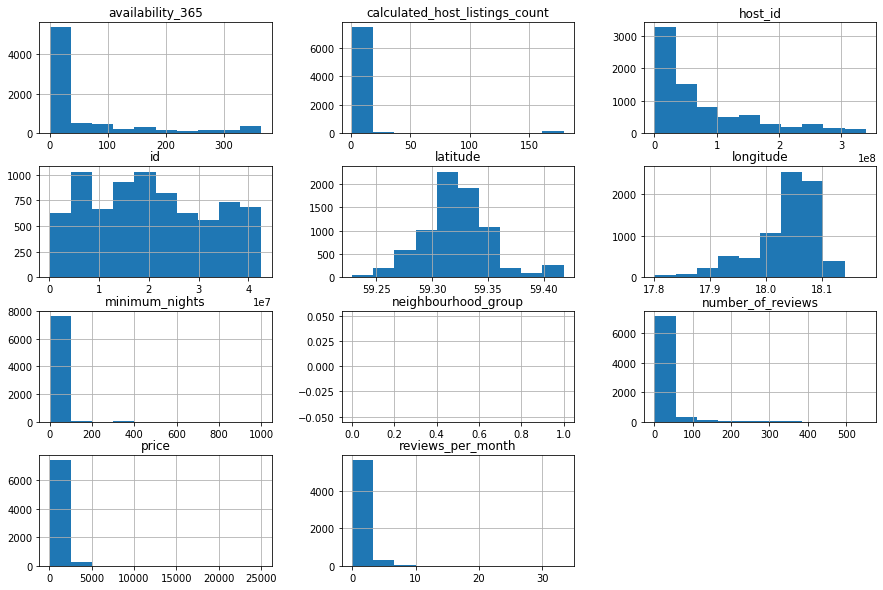

In [7]:
# plotar o histograma das variáveis numéricas
df.hist(figsize=(15,10));

### __Q4. Há _outliers_ presentes?__

Pelas distribuições dos histogramas, é possivel suspeitar da presença de _outliers_ no _dataset_. Iremos investigar as variáveis:

1. `avaliability_365`
2. `calculated_host_listings_count`
3. `minimum_nights`
4. `number_of_reviews`
5. `price`


In [8]:
# resumo estatístico das variáveis de interesse
df[['availability_365', 'calculated_host_listings_count', 'minimum_nights',
    'number_of_reviews', 'price']].describe()

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price
count,7677.000000,7677.000000,7677.000000,7677.000000,7677.000000
mean,55.352872,5.803960,5.540315,15.947375,1085.216230
std,99.819055,26.904488,23.177035,36.065756,958.043566
min,0.000000,1.000000,1.000000,0.000000,97.000000
25%,0.000000,1.000000,1.000000,1.000000,619.000000
50%,0.000000,1.000000,2.000000,5.000000,900.000000
75%,67.000000,1.000000,4.000000,15.000000,1248.000000
max,365.000000,179.000000,1000.000000,551.000000,24998.000000


#### __Q4.1 avaliability_365__

A média de dias disponíveis é de __55.3__ dias por ano, a mediana é de __nenhum__ dia. 

Vamos visualizar em um bosplot para entender menhor.

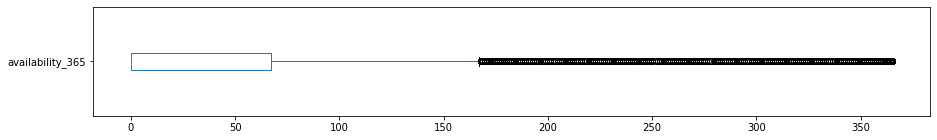

In [9]:
# bosplot da variável avaliability_365
df.availability_365.plot(kind='box', vert=False, figsize=(15,2));

Ao que parece, esses dados mostram que a maioria das propriedades ficam poucos dias disponíveis no ano.

#### __Q4.2 calculated_host_listings_count__

A média de propriedades que cada host tem é de __5.8__, parece um pouco estranho cada host ter quase 6 propriedades em Estocolmo.

Observando o desvio padrão de __26.9__ que é quase 4x maior que a média, esses dados estão apresentando uma alta variabilidade.

Se observarmos os quartis 25%, 50% e 75%, todos apresentam o mesmo mesma coclusão, parece que a grande maioria dos hosts de Estocolmo possuem apenas uma propriedade.

Vamos visualizar em um boxplot.

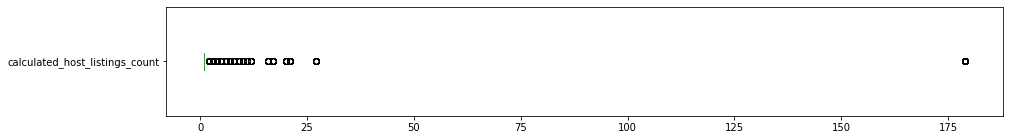

In [10]:
df.calculated_host_listings_count.plot(kind='box', vert=False, figsize=(15,2));

Mais de 25 pripriedades parece exagero, entretanto, mais de 175 é possivelmete um outlier.

#### __Q4.3 minimum_nights__

A média de quantidade mínima de noites é de __5.5__ noites, não parece plausível, lenvanto em conta que a maioria das estadias são para um final de semana (2 dias), por hipótese.

Quando olhamos a mediana, que é igual a __2__ noites, parece mais próximo da hipótese do final de semana. 

Podemos concluir que o dado está com a média enviesada por conta do valor máximo de quantidade mínima de noites para alugar ser igual a __1000__ e que certamente é um outlier.

Vamos ver em um box plot.

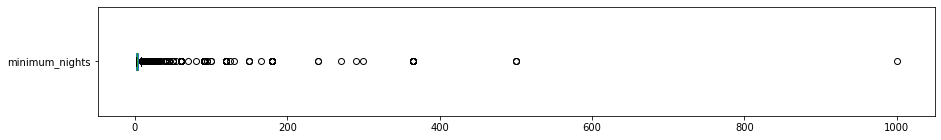

In [11]:
df.minimum_nights.plot(kind='box', vert=False, figsize=(15, 2));

A pergunta que temos de fazer é: "Quem se hospeda em um lugar que pede que o mínimo de noites seja maior que 100 dias?". Pois é, existe uma possibilidade de erros de digitação.

#### __Q4.4 number_of_reviews__

A média de reviews é de __15.9__ com uma mediana de __5__. 

Não podemos considerar que todos os dados discrepantes possam ser outliers por alguma forma de erro. Pode existir propriedades com anos de existência (no airbnb) e outras que acabaram de entrar. Um dado interessante seria número de comentarios dividido por tempo de cadastro.

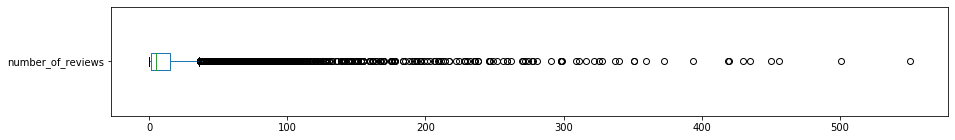

In [12]:
df.number_of_reviews.plot(kind='box', vert=False, figsize=(15,2));

#### __Q4.5 price__

A média de preço é de __1085.21__ unidades monetárias (acredito que sejam coroas suécas). Apenas por curiosidade, 1 coroa sueca vale 0.50 centavos de real em março de 2020.

O desvio padrão é muito alto __958.00__, maior que a mediana __900.00__. 

75% dos preços estão abaixo de __1248.00__.


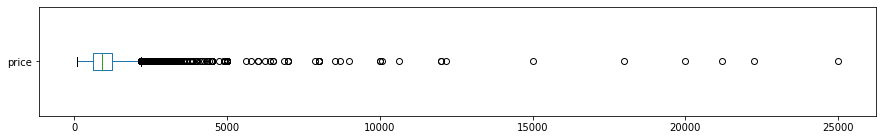

In [13]:
df.price.plot(kind='box', vert=False, figsize=(15,2));

### **Q5. Qual a correlação existente entre as variáveis**

In [14]:
# criar uma matriz de correlação
corr = df[['availability_365', 'calculated_host_listings_count', 'minimum_nights',
    'number_of_reviews', 'price', 'reviews_per_month']].corr()
# mostrar a matriz de correlação
display(corr)

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
availability_365,1.000000,-0.035364,0.111525,0.261847,0.088964,0.300517
calculated_host_listings_count,-0.035364,1.000000,-0.030629,-0.057814,-0.032566,0.063283
minimum_nights,0.111525,-0.030629,1.000000,-0.025740,-0.014345,-0.047426
number_of_reviews,0.261847,-0.057814,-0.025740,1.000000,-0.030974,0.624240
price,0.088964,-0.032566,-0.014345,-0.030974,1.000000,-0.014469
reviews_per_month,0.300517,0.063283,-0.047426,0.624240,-0.014469,1.000000


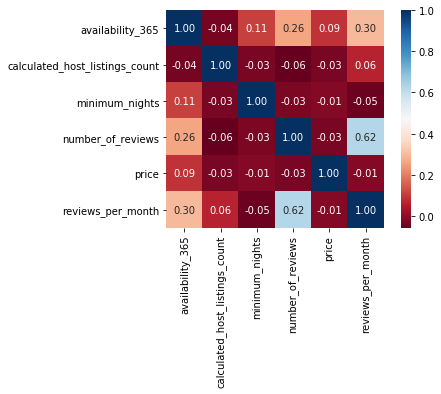

In [15]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', square=True, annot=True, linecolor='white', fmt='.2f');

### __Q5.1 Limpeza de dados__

Vamos observar se, ao filtrar os outliers, as correlações mudam.

In [16]:
# Remover os outliers e criar um novo data frame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.calculated_host_listings_count > 20].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 100].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.price > 5000].index, axis=0, inplace=True)

# criar uma matriz de correlação
corr2 = df_clean[['availability_365', 'calculated_host_listings_count', 'minimum_nights',
    'number_of_reviews', 'price', 'reviews_per_month']].corr()
# mostrar a matriz de correlação
display(corr2)

,availability_365,calculated_host_listings_count,minimum_nights,number_of_reviews,price,reviews_per_month
availability_365,1.000000,0.276390,0.060130,0.272963,0.087064,0.301721
calculated_host_listings_count,0.276390,1.000000,-0.007303,0.114294,-0.004726,0.310069
minimum_nights,0.060130,-0.007303,1.000000,-0.065359,-0.010511,-0.095759
number_of_reviews,0.272963,0.114294,-0.065359,1.000000,-0.034977,0.641360
price,0.087064,-0.004726,-0.010511,-0.034977,1.000000,-0.060139
reviews_per_month,0.301721,0.310069,-0.095759,0.641360,-0.060139,1.000000


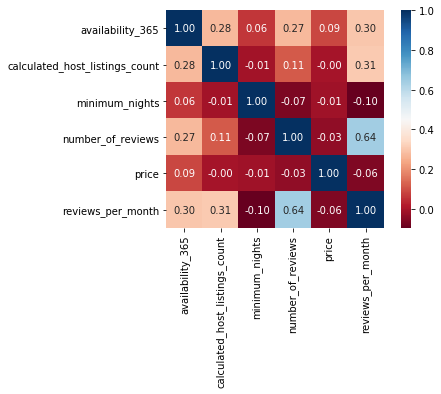

In [17]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr2, cmap='RdBu', square=True, annot=True, linecolor='white', fmt='.2f');

Parece que os _outliers_ não estão influenciando nas correlações entre as variáveis.

### **Q6. Qual o tipo de imóvel mais alugado no Airbnb de Estocolmo?**

In [18]:
# mostrar a quantidade de cada tipo de imóvel disponível
df.room_type.value_counts()

Entire home/apt    6297
Private room       1259
Hotel room           63
Shared room          58
Name: room_type, dtype: int64

In [19]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df.room_type.value_counts()/df.shape[0]

Entire home/apt    0.820242
Private room       0.163996
Hotel room         0.008206
Shared room        0.007555
Name: room_type, dtype: float64

In [20]:
# mostrar a média de preço com outlier
df.groupby(['room_type']).price.mean()

room_type
Entire home/apt    1189.339050
Hotel room         1236.984127
Private room        577.549643
Shared room         635.724138
Name: price, dtype: float64

In [21]:
# mostrar a média de preço sem outlier
df_clean.groupby(['room_type']).price.mean()

room_type
Entire home/apt    1142.864037
Hotel room          557.277778
Private room        568.474453
Shared room         635.724138
Name: price, dtype: float64

Interessante observar que o valor do quarto de hotel é o que mais sofre com a presença de _outliers_.

In [22]:
# mostrar o desvio padrão de preço com outlier
df.groupby(['room_type']).price.std()

room_type
Entire home/apt     993.203753
Hotel room         1569.667815
Private room        436.478847
Shared room         798.508539
Name: price, dtype: float64

In [23]:
# mostrar o desvio padrão de preço sem outlier
df_clean.groupby(['room_type']).price.std()

room_type
Entire home/apt    630.670905
Hotel room         312.059299
Private room       376.165401
Shared room        798.508539
Name: price, dtype: float64

In [24]:
minimo = df[df.room_type == 'Entire home/apt'].price.min()
maximo = df[df.room_type == 'Entire home/apt'].price.max()
minimo_c = df_clean[df_clean.room_type == 'Entire home/apt'].price.min()
maximo_c = df_clean[df_clean.room_type == 'Entire home/apt'].price.max()

print('Análise com outliers')
print(f'Valor mínimo para quarto de hotel é de {minimo}')
print(f'Valor máximo para quarto de hotel é de {maximo}')
print(f'Variação absoluta de {maximo-minimo}')
print()
print('Annálise sem outliers')
print(f'Valor mínimo para quarto de hotel é de {minimo_c}')
print(f'Valor máximo para quarto de hotel é de {maximo_c}')
print(f'Variação absoluta de {maximo_c-minimo_c}')

Análise com outliers
Valor mínimo para quarto de hotel é de 97
Valor máximo para quarto de hotel é de 24998
Variação absoluta de 24901

Annálise sem outliers
Valor mínimo para quarto de hotel é de 97
Valor máximo para quarto de hotel é de 4926
Variação absoluta de 4829


In [25]:
minimo = df[df.room_type == 'Hotel room'].price.min()
maximo = df[df.room_type == 'Hotel room'].price.max()
minimo_c = df_clean[df_clean.room_type == 'Hotel room'].price.min()
maximo_c = df_clean[df_clean.room_type == 'Hotel room'].price.max()

print('Análise com outliers')
print(f'Valor mínimo para quarto de hotel é de {minimo}')
print(f'Valor máximo para quarto de hotel é de {maximo}')
print(f'Variação absoluta de {maximo-minimo}')
print()
print('Annálise sem outliers')
print(f'Valor mínimo para quarto de hotel é de {minimo_c}')
print(f'Valor máximo para quarto de hotel é de {maximo_c}')
print(f'Variação absoluta de {maximo_c-minimo_c}')

Análise com outliers
Valor mínimo para quarto de hotel é de 135
Valor máximo para quarto de hotel é de 5004
Variação absoluta de 4869

Annálise sem outliers
Valor mínimo para quarto de hotel é de 135
Valor máximo para quarto de hotel é de 1597
Variação absoluta de 1462


### **Q6. Qual a localidade mais cara do dataset?**



In [26]:
# ver preços por bairros, na média
df.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)

neighbourhood
Norrmalms                 1279.359837
Östermalms                1228.111908
Södermalms                1204.349667
Kungsholmens              1114.308140
Bromma                    1078.086735
Älvsjö                     943.368098
Enskede-Årsta-Vantörs      937.897959
Hägersten-Liljeholmens     928.715714
Skarpnäcks                 925.435673
Farsta                     852.834951
Spånga-Tensta              798.320988
Hässelby-Vällingby         710.340782
Rinkeby-Tensta             704.694352
Skärholmens                661.600000
Name: price, dtype: float64

In [27]:
# ver qual bairro tem a maior variação de preços
df.groupby(['neighbourhood']).price.std().sort_values(ascending=False)

neighbourhood
Kungsholmens              1384.968928
Hägersten-Liljeholmens    1142.287952
Östermalms                1017.599515
Bromma                     990.466550
Norrmalms                  879.829985
Södermalms                 868.690998
Spånga-Tensta              838.188431
Enskede-Årsta-Vantörs      752.728382
Skarpnäcks                 723.974765
Hässelby-Vällingby         645.827464
Älvsjö                     610.510128
Farsta                     588.024358
Skärholmens                460.075387
Rinkeby-Tensta             264.323992
Name: price, dtype: float64

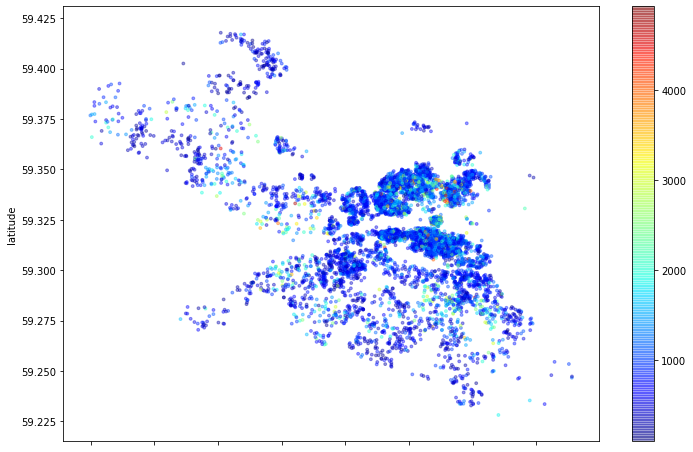

In [28]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
               c=df_clean.price, s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

## Conclusões


Foi feita apenas uma análise superficial na base de dados do Airbnb. Mesmo assim, chegamos à algumas conclusões:

Ao que parece, esses dados mostram que a maioria das propriedades ficam poucos dias disponíveis no ano.

75% dos preços estão abaixo de 1248.00.

As variáveis deste dataset não apresentam correlações importantes (número de reviews e número de reviews por mês deram uma correlação de .64, era de se esperar e essa informação não é relevante).

82% das estadias pelo airbnb em Estocolmo correspondem a apartamentos inteiros/casas, com uma média de preço de 993.20 e uma diferença absoluta de preço (max - min) de 4829.00.


